# BHZ model exercises

## $H$ spectrum

In [16]:
import numpy as np
from scipy.linalg import block_diag
import matplotlib.pyplot as plt

In [22]:
def Hamiltonian(k1,k2,M,consts):
    """
    Effective H diagonal block
    """
    # initialize
    [A,B,C,D] = consts
    H = np.zeros((2,2),dtype=complex)
    
    # fill up
    H[0,0] = M + C - (D + B) * (k1**2 + k2**2)
    H[1,0] = A * (k1 + 1j*k2)
    H[0,1] = H[1,0].conj()
    H[1,1] = -M + C - (D - B) * (k1**2 + k2**2)

    return H

In [23]:
def Heff(k1,k2,M,consts):
    """
    Effective Hamiltonian
    """
    # get top left
    H_00 = Hamiltonian(k1,k2,M,consts)
    
    # get bottom right
    H_11 = Hamiltonian(-k1,-k2,M,consts).conj()

    # make Heff
    H = block_diag(H_00, H_11)
    
    return H

In [34]:
def Energy(k1,k2,M,consts):
    """
    Eigenvalues of H
    """
    # get eigenvalues
    H = Heff(k1,k2,M,consts)
    energies = np.linalg.eigvalsh(H)
    
    return energies

In [107]:
resolution = 501
factor = 4
k1 = k2 = np.linspace(-np.pi,np.pi,num=resolution,endpoint=True)

def Energy(k1,k2,M,consts,resolution=101,factor=4):
    """
    Energies of H for array-like inputs
    """
    energies = np.zeros((resolution,resolution),dtype=float)
    for i in range(resolution): # k1
        for j in range(resolution): # k2
            Ham = Heff(k1[i],k2[j],M,consts)
            energiesi = np.linalg.eigvalsh(Ham)[0]
            energies[i,j] = energiesi
    return energies

In [111]:
K1,K2=np.meshgrid(k1,k2)
E = Energy(k1,k2,0.1,[3,1,0,0],resolution=resolution)

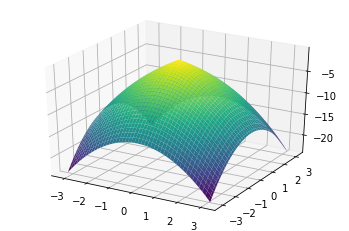

In [112]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(K1, K2, E,cmap="viridis")

plt.show()

# Dispersion of FT and PFT models

We now turn to the "full" model, i.e the one with sines and cosines. This can be done easily on Mathematica. We'll want to simulate the real space model for this as well. To recap, there are three models:

- Linear (lowest order in k)
- Full (all orders of k)
- Real space (inverse fourier transformed Full)

moreover, each of these models can have a magnetic field included in it. Here is the Real space model.

\begin{align}
        H_{B H Z}=\sum_{\vec{r}}\left\{c_{\vec{r}}^{\dagger}\left[M \sigma_{z}+C\right] c_{\vec{r}}+\sum_{j=x,y}\left(c_{\vec{r}+\hat{e}_{j}}^{\dagger}e^{i\theta^j_{\vec{r}}}\left[B \sigma_{z}+i \frac{A}{2} \sigma_{j}+D\right] c_{\vec{r}}+\mathrm{h.c.}\right)\right\}
\end{align}

where $\theta^j_{\vec{r}}=\int_{\vec{r}}^{\vec{r}+\hat{e}_{j}} \vec{A} \cdot \overrightarrow{\mathrm{d} \ell}$, the Peierls phase picked up for hopping from site $\vec{r}$ to site $\vec{r}+\hat{e}_j$. In the Landau gauge $\vec{A}=Bx\hat{y}$, this amounts to $\theta^y_{\vec{r}}=Bxa$ and $\theta^x_{\vec{r}}=0$. We'll do something very similar to what was done for the SOTI.

# Partially FT

In [1]:
import bhz
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("ticks")

## Spectrum

In [169]:
all_ks, all_Es = bhz.spectrum_plots_edge(size=90)

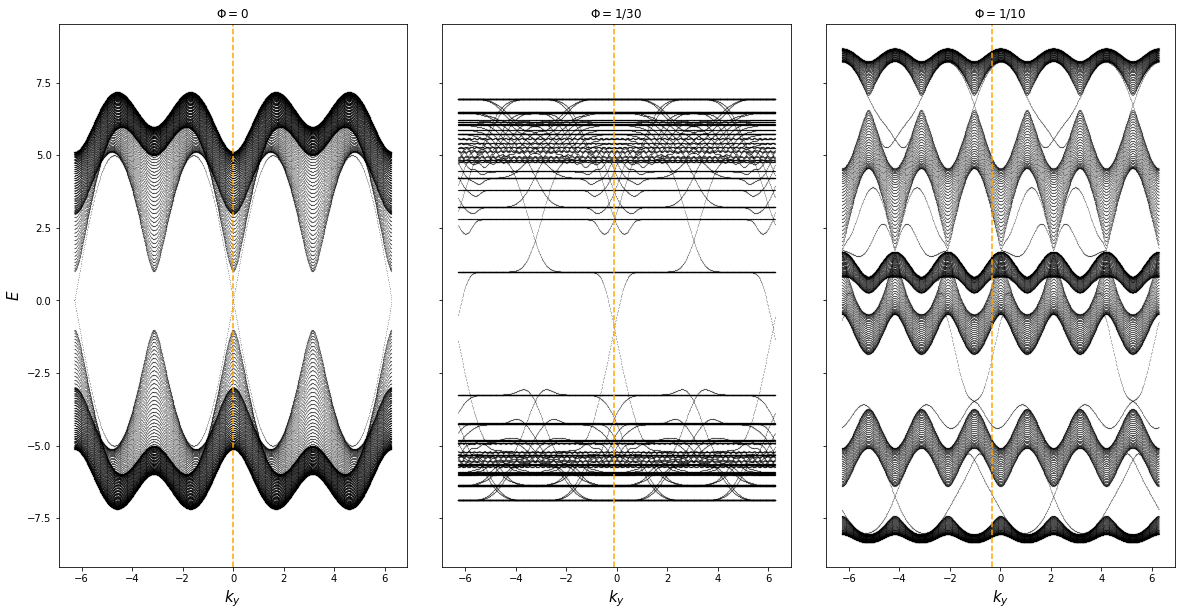

In [170]:
bhz.plot_spectrum(all_ks,all_Es)

In [723]:
H_pft = bhz.BHZ_edge_full(size=90, p=1, q=30)

In [ ]:
Es_pft, Ws_pft = np.linalg.eigh(H_pft)

In [116]:
Es_pft = np.loadtxt("bhz_energies_data_edge.csv",delimiter=',')
Es = np.loadtxt("Energies_p1_q90.csv",delimiter=',')

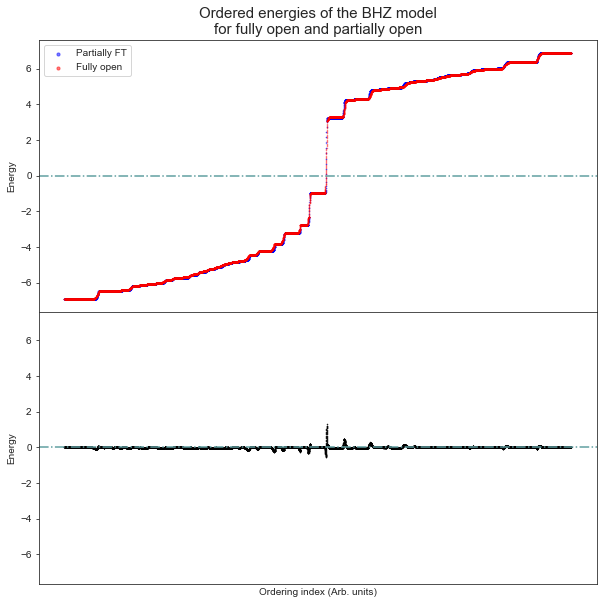

In [117]:
fig, ax = plt.subplots(nrows=2,ncols=1,sharex=True,sharey=True,figsize=(10,10))
fig.subplots_adjust(hspace=0)

ax[0].set_title("Ordered energies of the BHZ model\nfor fully open and partially open",fontsize=15)
ax[0].set_ylabel("Energy")
ax[0].set_xlabel("Ordering index (Arb. units)")
ax[0].set_xticks([])
ax[0].scatter(np.arange(0,np.size(Es_pft)),-Es_pft[::-1],c='b',marker='.',s=1,alpha=0.5,label="Partially FT")
ax[0].scatter(np.arange(0,np.size(Es)),Es,c='r',marker='.',s=1,alpha=0.5,label="Fully open")
ax[0].axhline(y=0,c='cadetblue',ls='-.')
lgnd = ax[0].legend(scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]

#ax[1].set_title("Residuals")
ax[1].set_ylabel("Energy")
ax[1].set_xlabel("Ordering index (Arb. units)")
ax[1].set_xticks([])
ax[1].scatter(np.arange(0,np.size(Es_pft)),-Es_pft[::-1]-Es,c='k',marker='.',s=1)
ax[1].axhline(y=0,c='cadetblue',ls='-.')

plt.show()

## Tunable mass

In [165]:
# make a few plots for three different cases
# I - M=D
# II - M=-D
# III - M=3!=1=D
# IV - M=3!=-1=D

### Look at different M's

In [130]:
def checkout_M(M):
    all_ks_I, all_Es_I = bhz.spectrum_plots_edge(size=90, ps=[0,1,10], qs=[30,30,30], k_res = 1000, k_start = -np.pi, 
                                   k_end = np.pi, M=M, A=3, B=1, C=0, D=0)
    bhz.plot_spectrum(all_ks_I,all_Es_I)

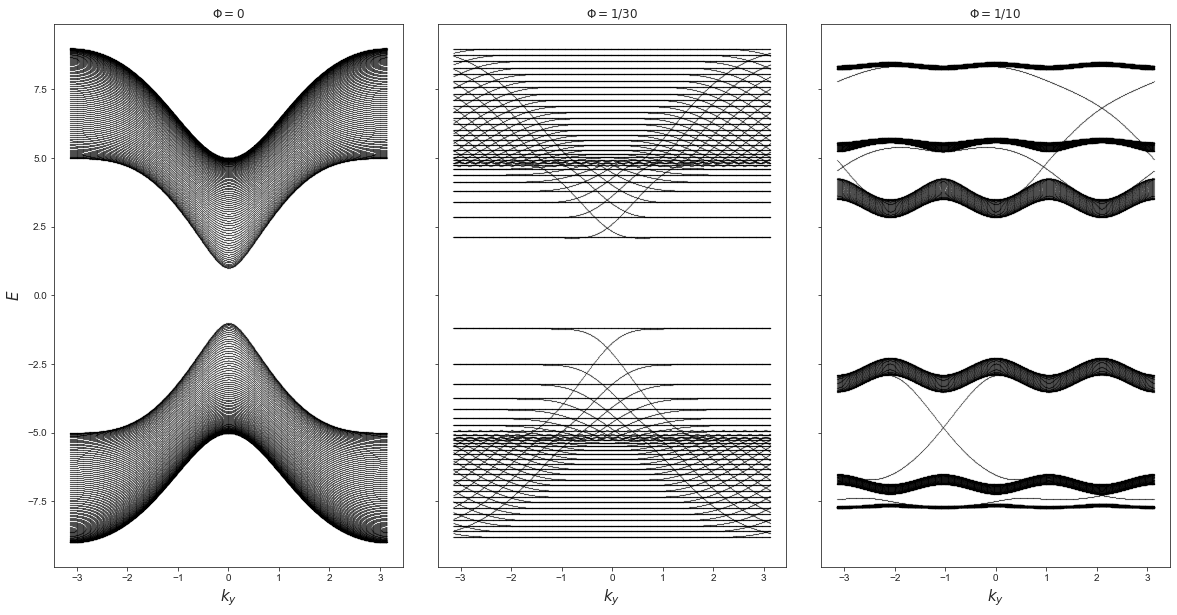

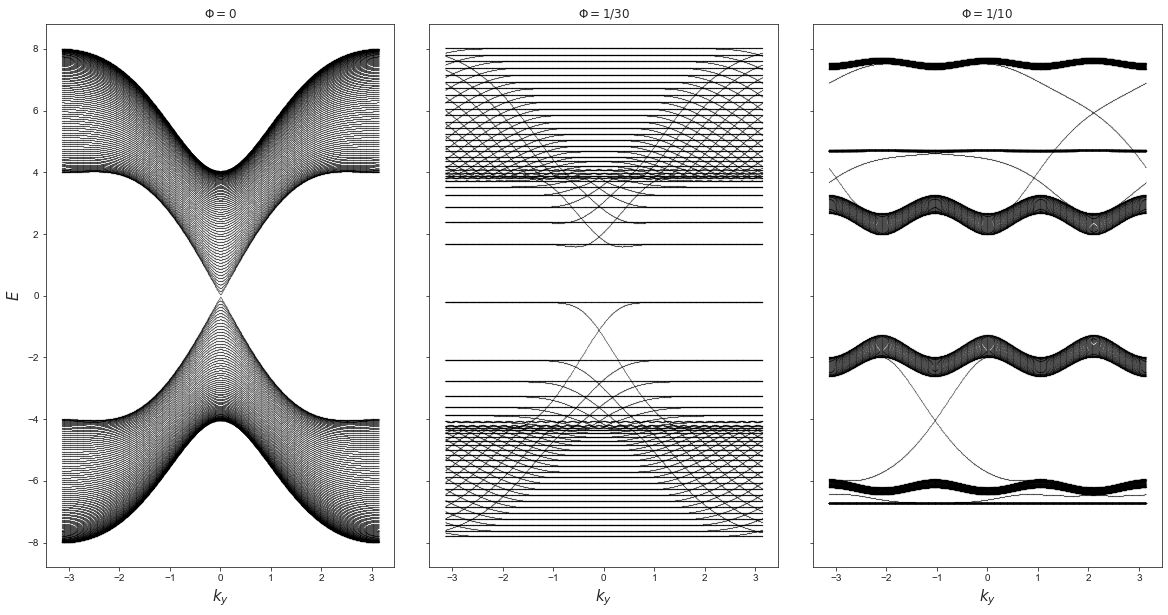

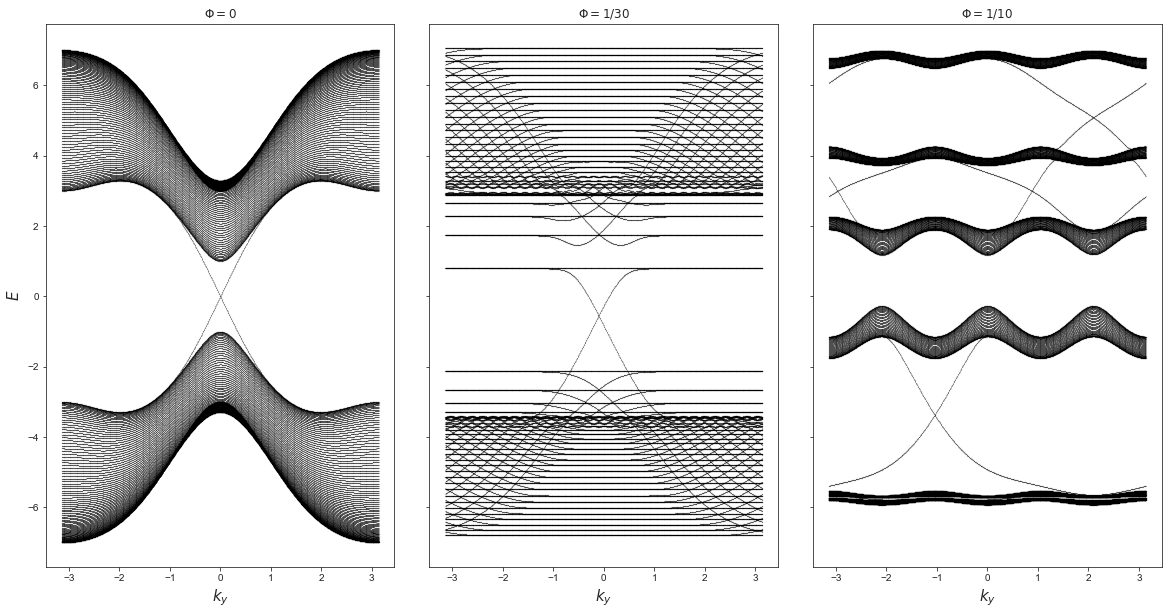

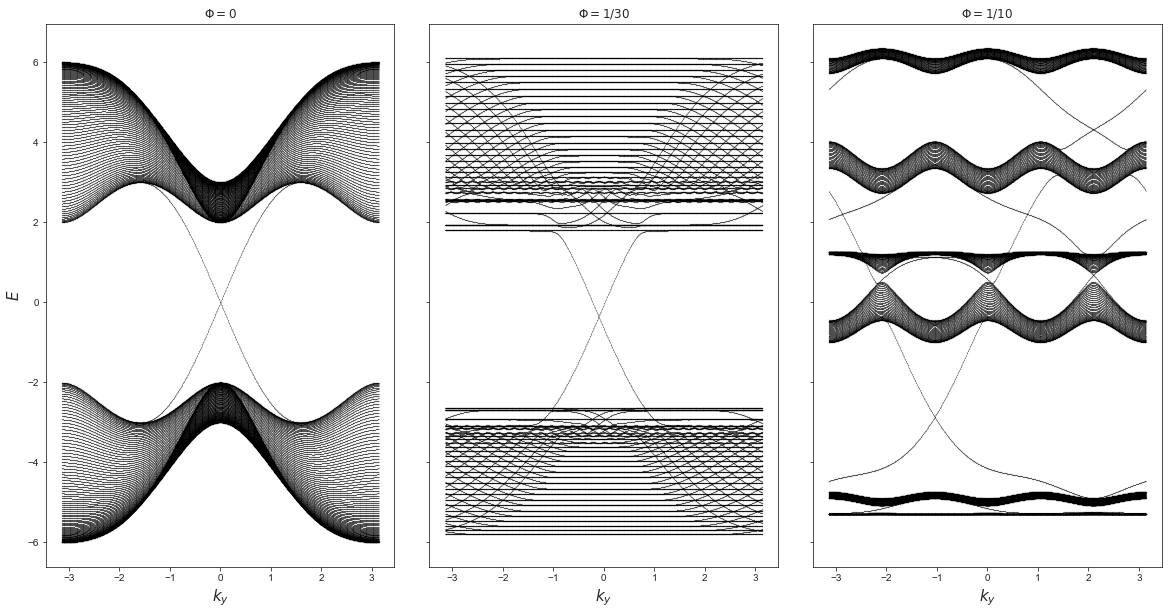

In [131]:
checkout_M(-1)
checkout_M(0)
checkout_M(1)
checkout_M(2)

### Look at different cases

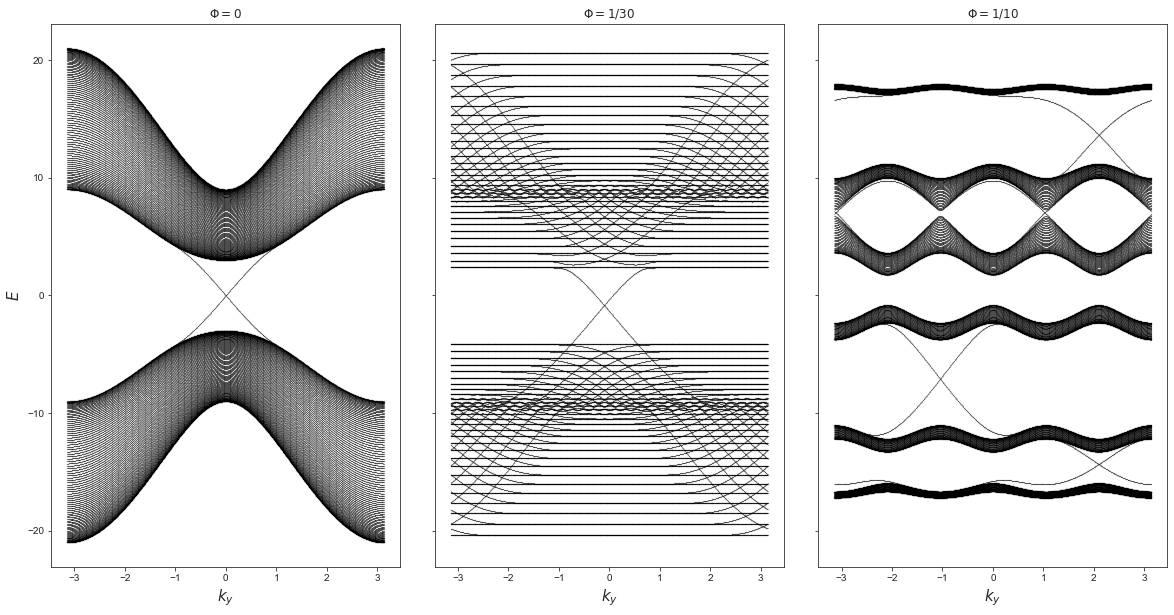

In [53]:
Ms = [3,3,3,3]
Bs = [3,-3,1,-1]

all_ks_I, all_Es_I = bhz.spectrum_plots_edge(size=90, ps=[0,1,10], qs=[30,30,30], k_res = 1000, k_start = -np.pi, 
                                   k_end = np.pi, M=Ms[0], A=5, B=Bs[0], C=0, D=0)
bhz.plot_spectrum(all_ks_I,all_Es_I)

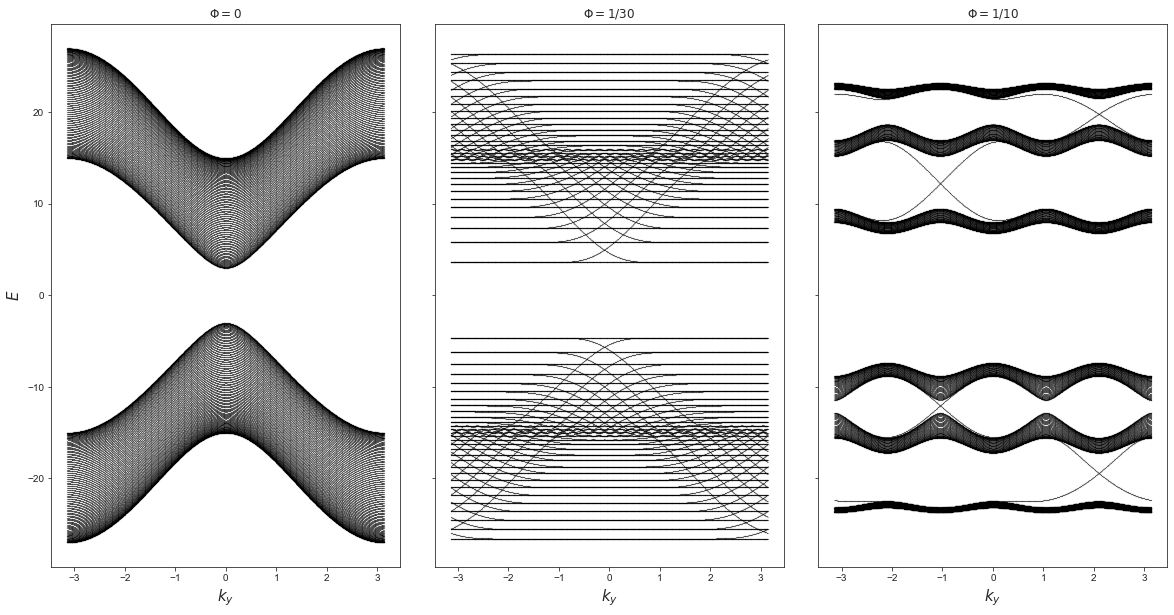

In [118]:
all_ks_II, all_Es_II = bhz.spectrum_plots_edge(size=90, ps=[0,1,10], qs=[30,30,30], k_res = 1000, k_start = -np.pi, 
                                   k_end = np.pi, M=Ms[1], A=5, B=Bs[1], C=0, D=0)
bhz.plot_spectrum(all_ks_II,all_Es_II)

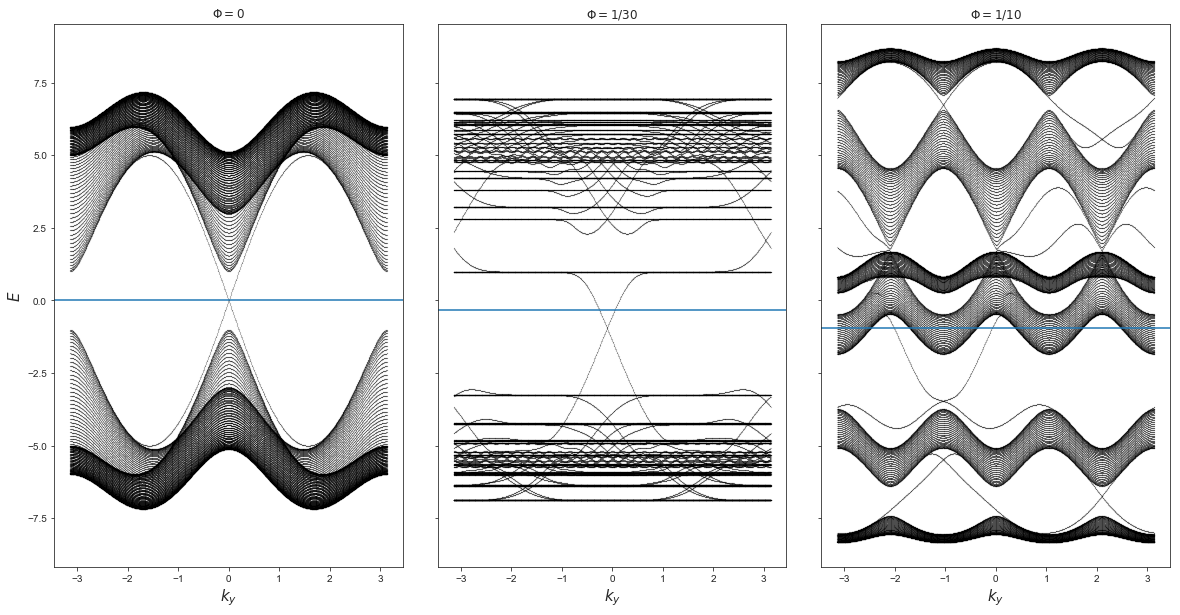

In [202]:
all_ks_III, all_Es_III = bhz.spectrum_plots_edge(size=90, ps=[0,1,10], qs=[30,30,30], k_res = 1000, k_start = -np.pi, 
                                   k_end = np.pi, M=3, A=5, B=1, C=0, D=0)
bhz.plot_spectrum(all_ks_III,all_Es_III)

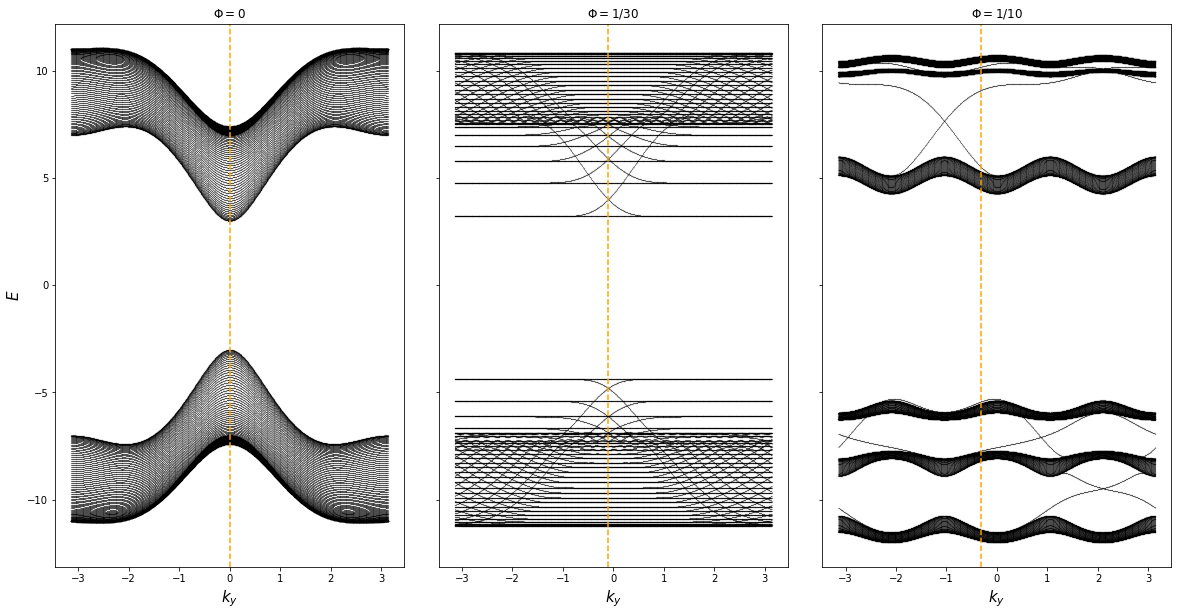

In [175]:
all_ks_IV, all_Es_IV = bhz.spectrum_plots_edge(size=90, ps=[0,1,10], qs=[30,30,30], k_res = 1000, k_start = -np.pi, 
                                   k_end = np.pi, M=Ms[3], A=5, B=Bs[3], C=0, D=0)
bhz.plot_spectrum(all_ks_IV,all_Es_IV)

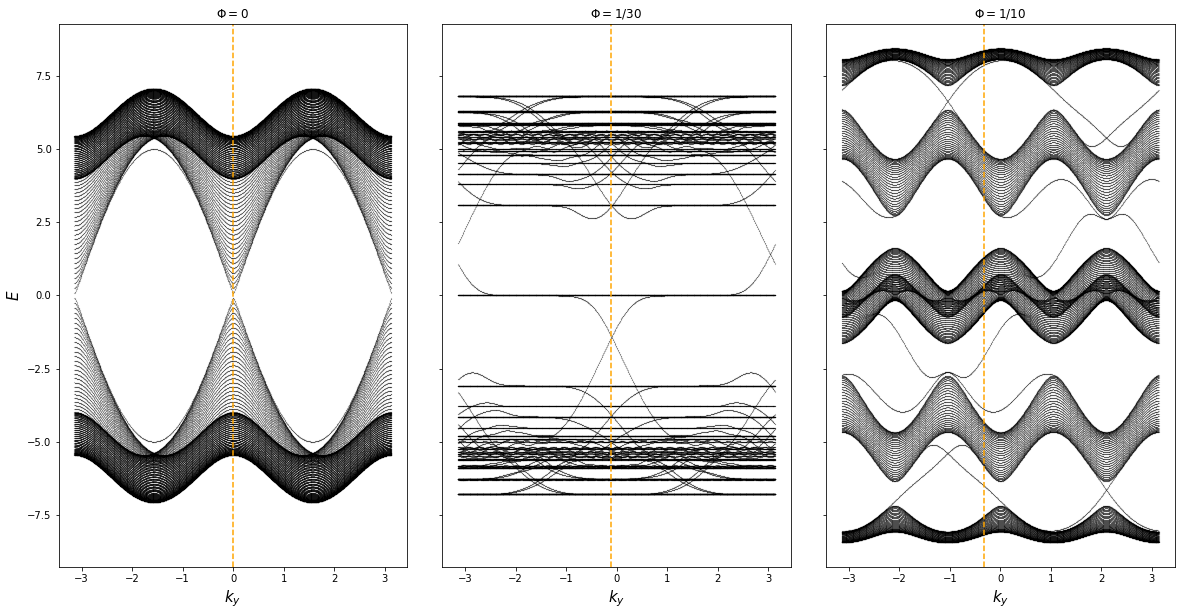

In [178]:
all_ks_V, all_Es_V = bhz.spectrum_plots_edge(size=90, ps=[0,1,10], qs=[30,30,30], k_res = 1000, k_start = -np.pi, 
                                   k_end = np.pi, M=4, A=5, B=1, C=0, D=0)
bhz.plot_spectrum(all_ks_V,all_Es_V)

In [45]:
all_ks_test, all_Es_test = bhz.spectrum_plots_edge(size=90, ps=[0,1,10], qs=[30,30,30], k_res = 1000, k_start = -np.pi, 
                                   k_end = np.pi, M=3, A=5, B=3, C=0, D=0)

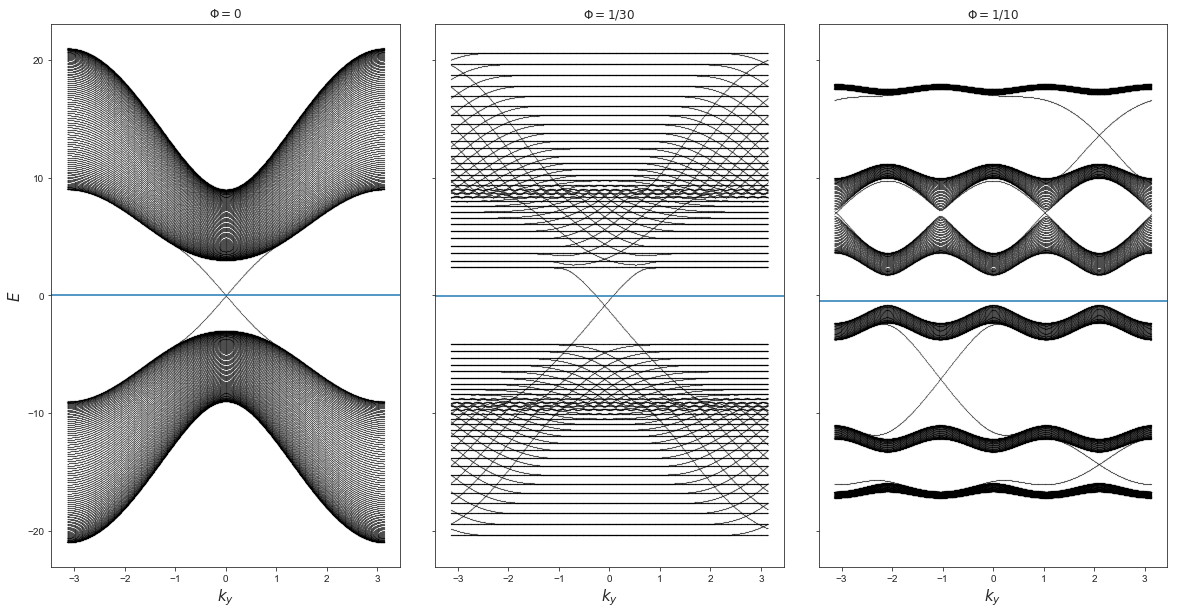

In [48]:
bhz.plot_spectrum(all_ks_test,all_Es_test,Phis=[0,1/30,1/3])

In [31]:
# check that levels shift asymmetrically away from shift
H_shift = bhz.BHZ_edge(size=90,p=1,q=30,ky=2,M=3,A=5,B=3,C=0,D=0)
E_shift = ssl.eigsh(H_shift,k=30,sigma=0,return_eigenvectors=False)

In [35]:
E_shift[18]

-4.1496033095242275

In [40]:
E_shift[26]

2.9507553462071843

In [42]:
(E_shift[18]+E_shift[26])/2

-0.5994239816585216

In [47]:
3*1/30/2

0.05

## Landau levels

Taking from the plot above, we'll want to hone in on the wavefunction of these LLs.

In [5]:
# k = 1.5 seems to be a good pick.
H_k15 = bhz.BHZ_edge(size=90,p=1,q=30,ky=1.5,M=3,A=5,B=3,C=0,D=0)

In [6]:
# diagonalize it to find the energies and wavefunctions
import scipy.sparse.linalg as ssl
E_k15, Ws_k15 = ssl.eigsh(H_k15,k=30,sigma=0,return_eigenvectors=True)

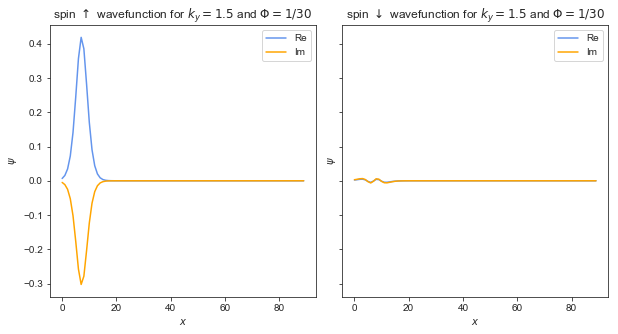

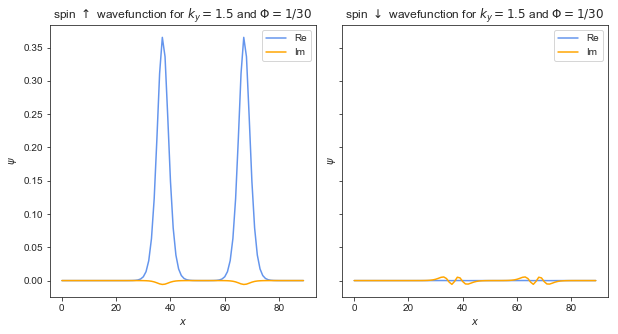

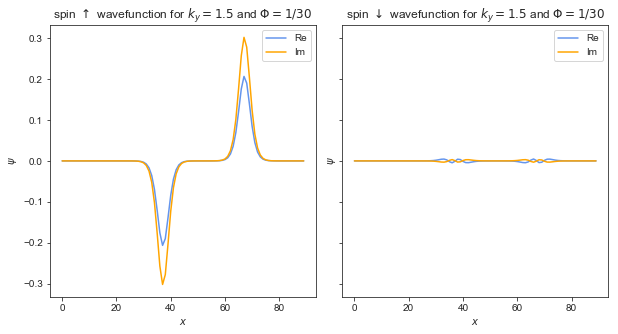

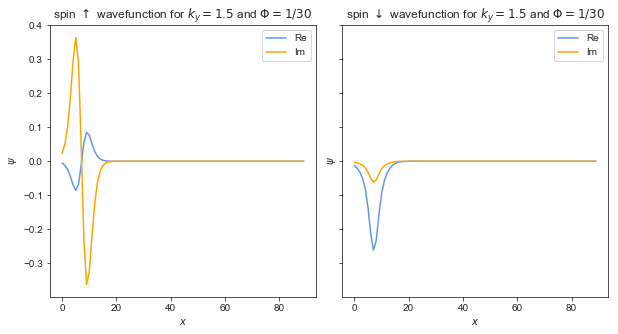

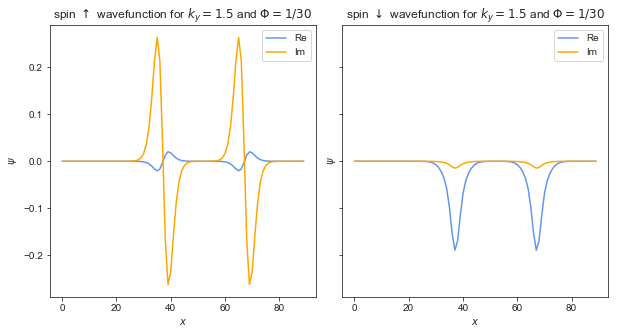

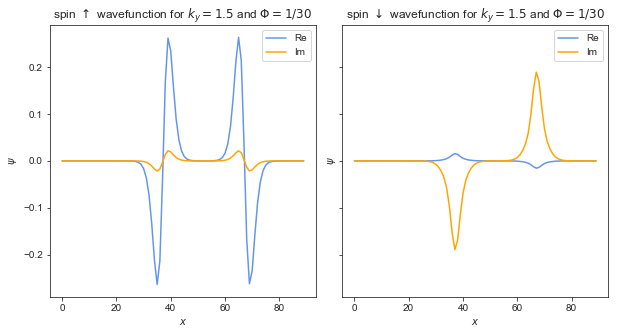

In [21]:
# what seems to be the 0th LL
bhz.plot_waves(Ws_k15[:,0])
bhz.plot_waves(Ws_k15[:,1])
bhz.plot_waves(Ws_k15[:,2])
# what seems to be the 1st LL
bhz.plot_waves(Ws_k15[:,3])
bhz.plot_waves(Ws_k15[:,4])
bhz.plot_waves(Ws_k15[:,5])

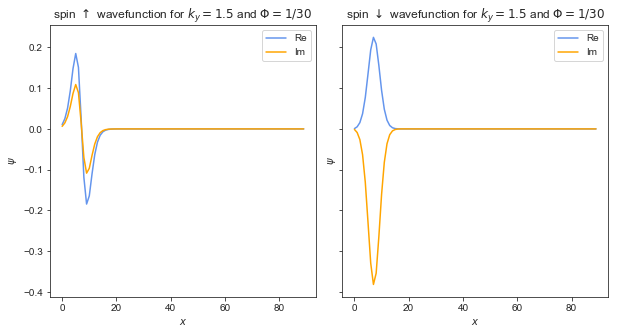

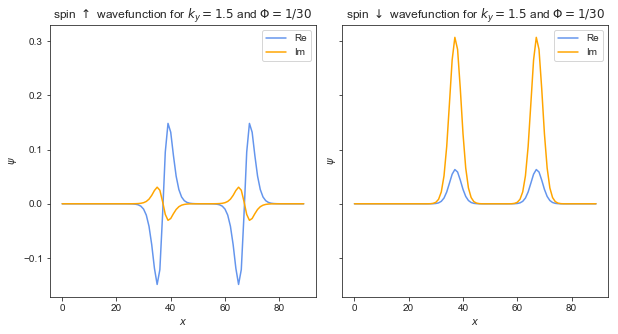

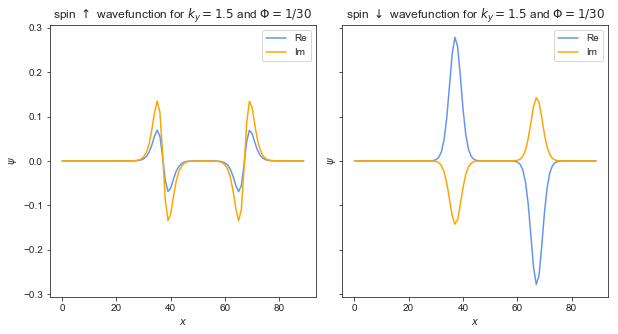

In [24]:
# what seems to be the -1st LL
bhz.plot_waves(Ws_k15[:,9])
bhz.plot_waves(Ws_k15[:,10])
bhz.plot_waves(Ws_k15[:,11])

In [2]:
re_up_0,im_up_0,re_do_0,im_do_0=bhz.adjust_for_phase(Ws_k15[:,1])

NameError: name 'Ws_k15' is not defined

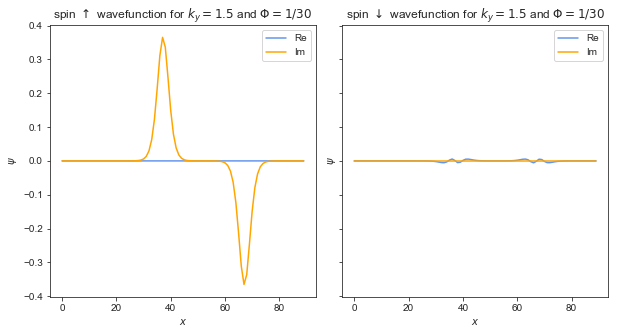

In [312]:
# 0th
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True,
                       sharey=True, figsize=(10, 5))
fig.subplots_adjust(wspace=0.1, hspace=0.25)

ax[0].set_title(
    r"spin $\uparrow$ wavefunction for $k_y = 1.5$ and $\Phi = 1/30$")
ax[0].plot(pos, re_up_0, label="Re", c='cornflowerblue')
ax[0].plot(pos, im_up_0, label="Im", c='orange')
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$\psi$")
ax[0].legend()

ax[1].set_title(
    r"spin $\downarrow$ wavefunction for $k_y = 1.5$ and $\Phi = 1/30$")
ax[1].plot(pos, re_do_0, label="Re", c='cornflowerblue')
ax[1].plot(pos, im_do_0, label="Im", c='orange')
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("$\psi$")
ax[1].legend()

plt.show()

In [126]:
# get the coefficients for the different wavefunctions
up_ll, do_ll = bhz.split_spins(Ws_k15[:,9])
p_up_ll, p_do_ll = bhz.split_spins(Ws_k15[:,3])

p_phase = bhz.get_phase(do_ll)
p_up_ll_fixed = np.exp(-1j*p_phase)*p_up_ll
p_do_ll_fixed = np.exp(-1j*p_phase)*p_do_ll

p_re_up_ll_fixed, p_im_up_ll_fixed = bhz.split_real_imaginary(p_up_ll_fixed)
p_re_do_ll_fixed, p_im_do_ll_fixed = bhz.split_real_imaginary(p_do_ll_fixed)

phase = bhz.get_phase(do_ll)
up_ll_fixed = np.exp(-1j*phase)*up_ll
do_ll_fixed = np.exp(-1j*phase)*do_ll

re_up_ll_fixed, im_up_ll_fixed = bhz.split_real_imaginary(up_ll_fixed)
re_do_ll_fixed, im_do_ll_fixed = bhz.split_real_imaginary(do_ll_fixed)

In [120]:
pos = np.arange(0,90)

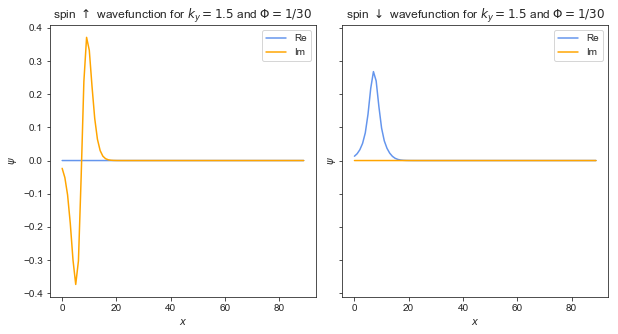

In [129]:
# plus one
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True,
                       sharey=True, figsize=(10, 5))
fig.subplots_adjust(wspace=0.1, hspace=0.25)

ax[0].set_title(
    r"spin $\uparrow$ wavefunction for $k_y = 1.5$ and $\Phi = 1/30$")
ax[0].plot(pos, p_re_up_ll_fixed, label="Re", c='cornflowerblue')
ax[0].plot(pos, p_im_up_ll_fixed, label="Im", c='orange')
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$\psi$")
ax[0].legend()

ax[1].set_title(
    r"spin $\downarrow$ wavefunction for $k_y = 1.5$ and $\Phi = 1/30$")
ax[1].plot(pos, p_re_do_ll_fixed, label="Re", c='cornflowerblue')
ax[1].plot(pos, p_im_do_ll_fixed, label="Im", c='orange')
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("$\psi$")
ax[1].legend()

plt.show()

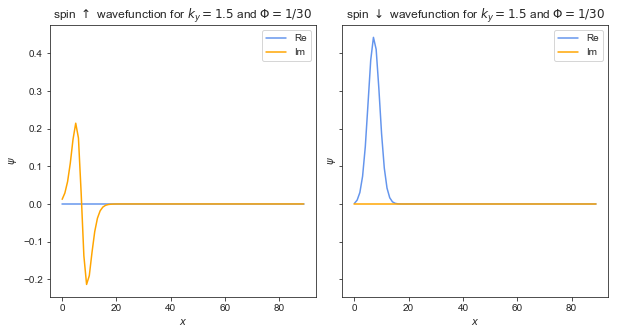

In [125]:
# minus one
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True,
                       sharey=True, figsize=(10, 5))
fig.subplots_adjust(wspace=0.1, hspace=0.25)

ax[0].set_title(
    r"spin $\uparrow$ wavefunction for $k_y = 1.5$ and $\Phi = 1/30$")
ax[0].plot(pos, re_up_ll_fixed, label="Re", c='cornflowerblue')
ax[0].plot(pos, im_up_ll_fixed, label="Im", c='orange')
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$\psi$")
ax[0].legend()

ax[1].set_title(
    r"spin $\downarrow$ wavefunction for $k_y = 1.5$ and $\Phi = 1/30$")
ax[1].plot(pos, re_do_ll_fixed, label="Re", c='cornflowerblue')
ax[1].plot(pos, im_do_ll_fixed, label="Im", c='orange')
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("$\psi$")
ax[1].legend()

plt.show()

In [131]:
u_plus_one,v_plus_one=bhz.get_coefficients(Ws_k15[:,3])
print("Check that 1 =",u_plus_one*u_plus_one.conj() + v_plus_one*v_plus_one.conj())

Check that 1 = (1.0000000000000038+0j)


In [130]:
u_minus_one,v_minus_one=bhz.get_coefficients(Ws_k15[:,9])
print("Check that 1 =",u_minus_one*u_minus_one.conj() + v_minus_one*v_minus_one.conj())

Check that 1 =  (0.9999999999999998+0j)


In [133]:
# should be ~close~ to zero
print("Check that 0 =",np.abs(u_minus_one.conj()*u_plus_one+v_minus_one.conj()*v_plus_one)**2)

Check that 0 = 2.545766901481114e-06


### Gaussian fit

In [296]:
def H_0(x,A,s,c):
    """
    Zeroth Hermitian polynomial
    """
    return A * np.exp(-1/2*((x-c)/s)**2) * 1/np.sqrt(s*np.sqrt(np.pi))

In [291]:
def H_1(x,A,s,c):
    """
    First Hermitian polynomial
    """
    return A * (2*(x-c)/s*np.exp(-1/2*((x-c)/s)**2)) * 1/np.sqrt(2*s*np.sqrt(np.pi))

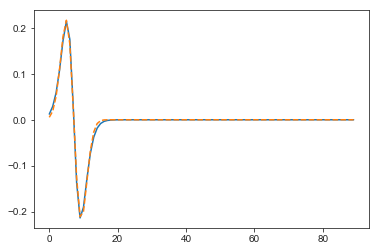

|A|^2 = 0.247


In [303]:
from scipy.optimize import curve_fit

[A,s,c],cov=curve_fit(H_1,xdata=pos,ydata=im_up_ll_fixed,p0=[1,1,6])
H_fit=H_1(pos,A,s,c)

plt.figure()
plt.plot(pos,im_up_ll_fixed)
plt.plot(pos,H_fit,ls='--')
plt.show()

print("|A|^2 = {:.3}".format(A**2))

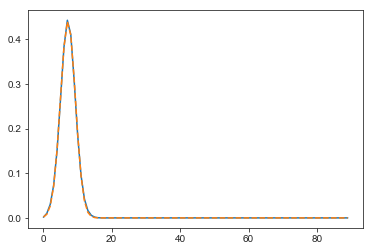

|A|^2 = 0.752


In [302]:
[A,s,c],cov=curve_fit(H_0,xdata=pos,ydata=re_do_ll_fixed,p0=[1,1,6])
H_fit=H_0(pos,A,s,c)

plt.figure()
plt.plot(pos,re_do_ll_fixed)
plt.plot(pos,H_fit,ls='--')
plt.show()

print("|A|^2 = {:.3}".format(A**2))

## Variable M butterfly

From above, we've seen that the $M=B$ and $M=-B$ cases are simple cases of interest. We'll want to look at how the energy levels vary as a function of the mass parameter $M$ for a fixed $B$, say $B = 3$. 

In [ ]:
# Mstar = 4*B

In [112]:
Masses, Energies0, Energiesp1, Energiesm1 = bhz.variable_M_LL(size=90,p=1,q=30,ky=1.5,M_start=-5,M_end=5,A=5,B=3,C=0,D=0)


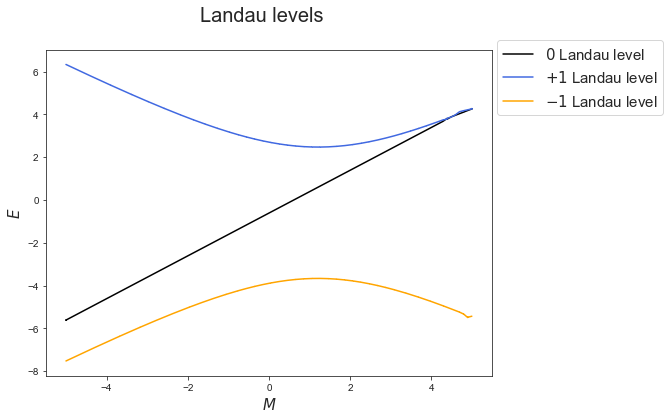

In [124]:
plt.figure(figsize=(8,6))

plt.suptitle("Landau levels",fontsize=20)
plt.ylabel(r"$E$",fontsize=15)
plt.xlabel(r"$M$",fontsize=15)
plt.plot(Masses,Energies0,c='k',label="$0$ Landau level")
plt.plot(Masses,Energiesp1,c='royalblue',label="$+1$ Landau level")
plt.plot(Masses,Energiesm1,c='orange',label="$-1$ Landau level")
plt.legend(loc=(1.01,0.8),fontsize=15)

plt.show()

In [114]:
Energies0=np.asarray(Energies0)
Energiesp1=np.asarray(Energiesp1)
Energiesm1=np.asarray(Energiesm1)

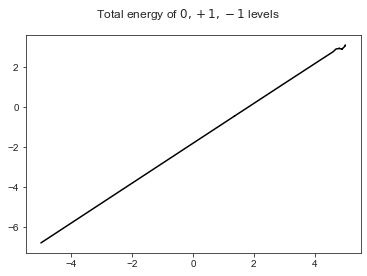

In [115]:
plt.figure()
plt.suptitle("Total energy of $0,+1,-1$ levels")
plt.plot(Masses,Energiesp1+Energiesm1+Energies0,c='k')
plt.show()

In [125]:
zero_Masses, zero_Energies0, zero_Energiesp1, zero_Energiesm1 = bhz.variable_M_LL(size=90,p=1,q=30,ky=1.5,M_start=-1,M_end=1,A=5,B=3,C=0,D=0)


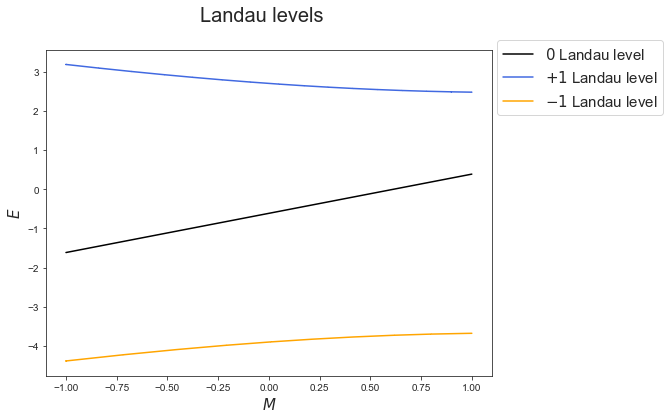

In [128]:
plt.figure(figsize=(8,6))

plt.suptitle("Landau levels",fontsize=20)
plt.ylabel(r"$E$",fontsize=15)
plt.xlabel(r"$M$",fontsize=15)
plt.plot(zero_Masses,zero_Energies0,c='k',label="$0$ Landau level")
plt.plot(zero_Masses,zero_Energiesp1,c='royalblue',label="$+1$ Landau level")
plt.plot(zero_Masses,zero_Energiesm1,c='orange',label="$-1$ Landau level")
plt.legend(loc=(1.01,0.8),fontsize=15)

plt.show()

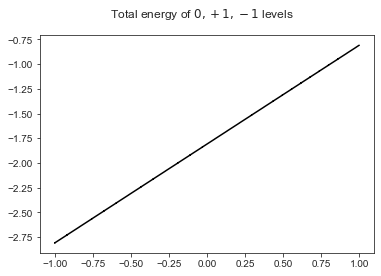

In [129]:
zero_Energies0=np.asarray(zero_Energies0)
zero_Energiesp1=np.asarray(zero_Energiesp1)
zero_Energiesm1=np.asarray(zero_Energiesm1)

plt.figure()
plt.suptitle("Total energy of $0,+1,-1$ levels")
plt.plot(zero_Masses,zero_Energiesp1+zero_Energiesm1+zero_Energies0,c='k')
plt.show()

## Butterfly

### Closed in both directions

In [214]:
# for periodic slab
p_per,e_per=bhz.get_phis_eps_FT(qmax=50,kx=0,ky=0,M=3,A=5,B=3,C=0,D=0)

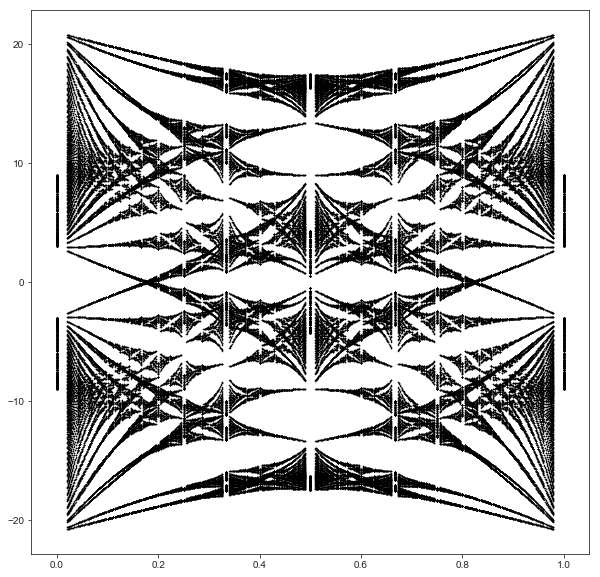

In [215]:
plt.figure(figsize=(10,10))
plt.scatter(p_per,e_per,c='k',s=1,marker='.')
plt.show()

### M=3, A=5, B=1

In [ ]:
phi, ep = bhz.get_phis_eps(qmax=50,ucsize=1,ky=0,M=3,A=5,B=1,C=0,D=0)
phi1, ep1 = bhz.get_phis_eps(qmax=50,ucsize=1,ky=np.pi,M=3,A=5,B=1,C=0,D=0)
phi2, ep2 = bhz.get_phis_eps(qmax=50,ucsize=1,ky=-np.pi,M=3,A=5,B=1,C=0,D=0)
phi3, ep3 = bhz.get_phis_eps(qmax=50,ucsize=1,ky=-np.pi/2,M=3,A=5,B=1,C=0,D=0)
phi4, ep4 = bhz.get_phis_eps(qmax=50,ucsize=1,ky=np.pi/2,M=3,A=5,B=1,C=0,D=0)

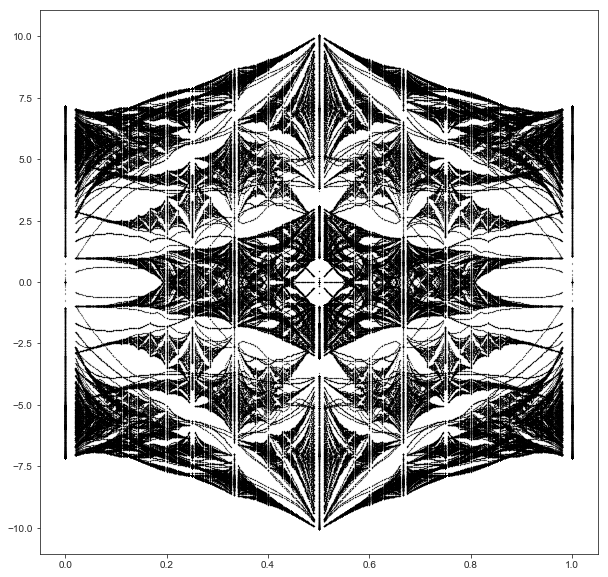

In [182]:
# M=3,A=5,B=1
plt.figure(figsize=(10,10))
plt.scatter(phi,ep,c='k',s=0.1,marker='.')
plt.scatter(phi1,ep1,c='k',s=0.1,marker='.')
plt.scatter(phi2,ep2,c='k',s=0.1,marker='.')
plt.scatter(phi3,ep3,c='k',s=0.1,marker='.')
plt.scatter(phi4,ep4,c='k',s=0.1,marker='.')
plt.show()

### M=3, A=5, B=3

In [183]:
phis0, eps0 = bhz.get_phis_eps(qmax=50,ucsize=1,ky=0,M=3,A=5,B=3,C=0,D=0)
phis1, eps1 = bhz.get_phis_eps(qmax=50,ucsize=1,ky=np.pi,M=3,A=5,B=3,C=0,D=0)
phis2, eps2 = bhz.get_phis_eps(qmax=50,ucsize=1,ky=-np.pi,M=3,A=5,B=3,C=0,D=0)
phis3, eps3 = bhz.get_phis_eps(qmax=50,ucsize=1,ky=-np.pi/2,M=3,A=5,B=3,C=0,D=0)
phis4, eps4 = bhz.get_phis_eps(qmax=50,ucsize=1,ky=np.pi/2,M=3,A=5,B=3,C=0,D=0)

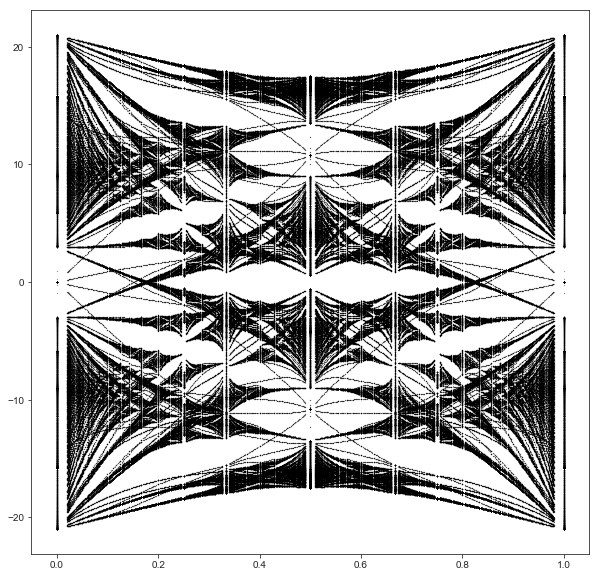

In [189]:
# M=3,A=5,B=3
plt.figure(figsize=(10,10))
plt.scatter(phis0,eps0,c='k',s=0.1,marker='.')
plt.scatter(phis1,eps1,c='k',s=0.1,marker='.')
plt.scatter(phis2,eps2,c='k',s=0.1,marker='.')
plt.scatter(phis3,eps3,c='k',s=0.1,marker='.')
plt.scatter(phis4,eps4,c='k',s=0.1,marker='.')
plt.show()

In [187]:
phis5, eps5 = bhz.get_phis_eps(qmax=50,ucsize=1,ky=-np.pi/4,M=3,A=5,B=3,C=0,D=0)
phis6, eps6 = bhz.get_phis_eps(qmax=50,ucsize=1,ky=np.pi/4,M=3,A=5,B=3,C=0,D=0)
phis7, eps7 = bhz.get_phis_eps(qmax=50,ucsize=1,ky=-3*np.pi/4,M=3,A=5,B=3,C=0,D=0)
phis8, eps8 = bhz.get_phis_eps(qmax=50,ucsize=1,ky=3*np.pi/4,M=3,A=5,B=3,C=0,D=0)

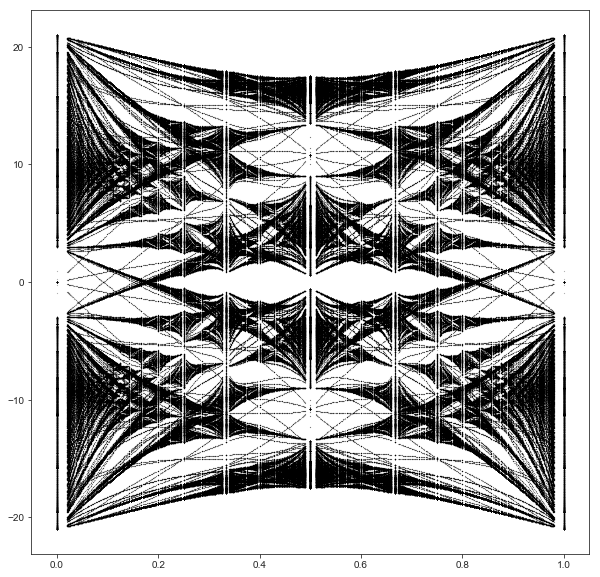

In [190]:
# M=3,A=5,B=3
plt.figure(figsize=(10,10))
plt.scatter(phis0,eps0,c='k',s=0.05,marker='.')
plt.scatter(phis1,eps1,c='k',s=0.05,marker='.')
plt.scatter(phis2,eps2,c='k',s=0.05,marker='.')
plt.scatter(phis3,eps3,c='k',s=0.05,marker='.')
plt.scatter(phis4,eps4,c='k',s=0.05,marker='.')
plt.scatter(phis5,eps5,c='k',s=0.05,marker='.')
plt.scatter(phis6,eps6,c='k',s=0.05,marker='.')
plt.scatter(phis7,eps7,c='k',s=0.05,marker='.')
plt.scatter(phis8,eps8,c='k',s=0.05,marker='.')
plt.show()

In [198]:
ps0,es0,pb0,eb0 = bhz.get_phis_eps(qmax=50,ucsize=1,ky=0,M=3,A=5,B=3,C=0,D=0)
ps1,es1,pb1,eb1 = bhz.get_phis_eps(qmax=50,ucsize=1,ky=np.pi,M=3,A=5,B=3,C=0,D=0)
ps2,es2,pb2,eb2 = bhz.get_phis_eps(qmax=50,ucsize=1,ky=-np.pi,M=3,A=5,B=3,C=0,D=0)
# ps3,es3,pb3,eb3 = bhz.get_phis_eps(qmax=50,ucsize=1,ky=-np.pi/2,M=3,A=5,B=-3,C=0,D=0)
# ps4,es4,pb4,eb4 = bhz.get_phis_eps(qmax=50,ucsize=1,ky=np.pi/2,M=3,A=5,B=-3,C=0,D=0)

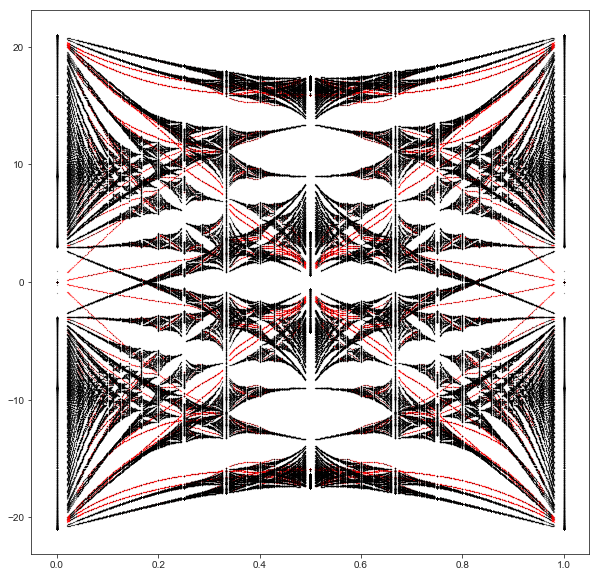

In [201]:
# M=3,A=5,B=3
plt.figure(figsize=(10,10))
plt.scatter(ps0,es0,c='r',s=0.1,marker='.')
plt.scatter(pb0,eb0,c='k',s=0.1,marker='.')
plt.scatter(ps1,es1,c='r',s=0.1,marker='.')
plt.scatter(pb1,eb1,c='k',s=0.1,marker='.')
plt.scatter(ps2,es2,c='r',s=0.1,marker='.')
plt.scatter(pb2,eb2,c='k',s=0.1,marker='.')
# plt.scatter(phis2,eps2,c='k',s=0.1,marker='.')
# plt.scatter(phis3,eps3,c='k',s=0.1,marker='.')
# plt.scatter(phis4,eps4,c='k',s=0.1,marker='.')
plt.show()

### OG

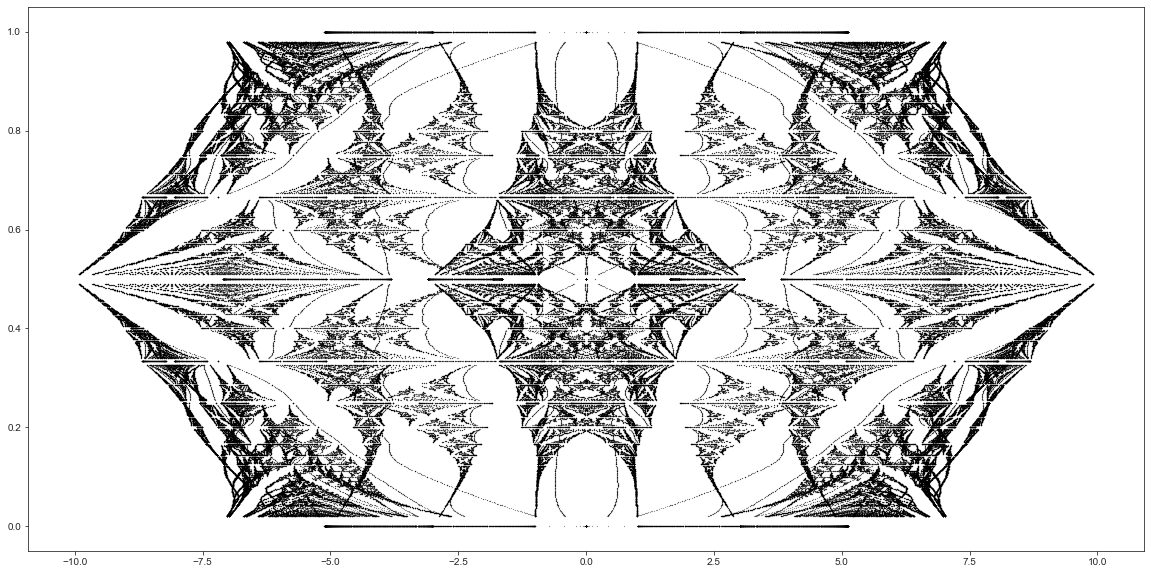

In [7]:
# this one is for M=3,A=5,B=1
plt.figure(figsize=(20,10))
plt.scatter(eps,phis,c='k',s=0.1,marker='.')
plt.show()

# Real space

In [48]:
import bhz as bhz
%load_ext autoreload
%autoreload 2
import scipy.sparse.linalg as ssl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
# M=3,B=1,A=5,C=D=0
H_full = bhz.BHZ_real(size=90,p=1,q=10)

In [88]:
Es=ssl.eigsh(H_full,k=H_full.shape[0],return_eigenvectors=False)

In [90]:
Es = np.loadtxt("Energies_p1_q90.csv",delimiter=',')
#np.savetxt("Wavefunctions_p1_q90.csv",Ws)

## Energies

In [95]:
Es_plateau, idx_p, counts_p = bhz.find_plateaus(np.sort(Es))

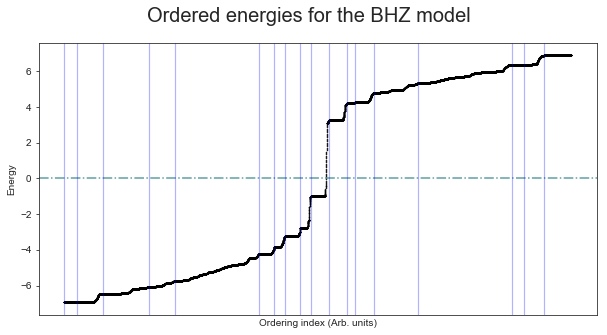

In [96]:
plt.figure(figsize=(10,5))
plt.suptitle("Ordered energies for the BHZ model",fontsize=20)
plt.ylabel("Energy")
plt.xlabel("Ordering index (Arb. units)")
plt.xticks([])
plt.scatter(np.arange(0,np.size(Es)),np.sort(Es),c='k',marker='.',s=1)
plt.axhline(y=0,c='cadetblue',ls='-.')
for idx in idx_p:
    plt.axvline(x=idx,c='b',ls='-',linewidth=1.2, alpha=0.3)
#plt.axvline(x=idx_p[27],c='r',ls='-',linewidth=1.2, alpha=0.3)
plt.show()

In [97]:
# arange energies by n
i0 = np.argmin(abs(Es_plateau))
# get stop on symmetric range
max_range = np.min([i0,len(Es_plateau)-i0])
Plateaus_ordered = np.zeros(len(Es_plateau),dtype=float)
Plateaus_ordered[0] = Es_plateau[i0]
for i in range(1,max_range):
    Plateaus_ordered[2*i-1] = Es_plateau[i0+i]
    Plateaus_ordered[2*i] = Es_plateau[i0-i]

# remove zeros
Plateaus_ordered = Plateaus_ordered[Plateaus_ordered != 0]

In [98]:
ns = np.zeros(len(Plateaus_ordered),dtype=float)
ns[0] = 0
for i in range(1,max_range):
    ns[2*i-1] = i
    ns[2*i] = i

In [116]:
def theory(ns,Phi,M=3,A=5,B=1,C=0,D=0):
    """
    Theoretical prediction for energy levels
    Do B and other parameters matter?
    """
    mag = Phi*(2*np.pi)

    theoretical = np.zeros(len(ns),float)
    theoretical[0] = -M + B*mag
#     v0 = A
#     Dsurf = M
    for i in range(1,max_range):
        n = ns[2*i]
        # plus
        theoretical[2*i-1] = B*mag + np.sqrt(2*A**2*mag*(n+1)+(M-2*B*mag*(n+1))**2)
        # minus
        theoretical[2*i] = B*mag - np.sqrt(2*A**2*mag*(n+1)+(M-2*B*mag*(n+1))**2)
#         theoretical[2*i-1] = B*2*np.pi*Phi/2 + np.sqrt((Dsurf-B*2*np.pi*Phi*(n-1/2))**2+2*v0**2*Phi*n)
#         theoretical[2*i] = B*2*np.pi*Phi/2 - np.sqrt((Dsurf-B*2*np.pi*Phi*(n-1/2))**2+2*v0**2*Phi*n)
        
    return theoretical

In [122]:
theoretical = theory(ns,1/90)

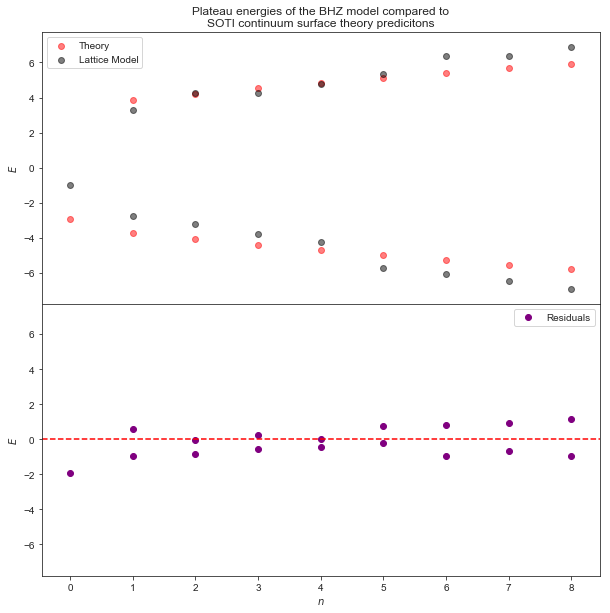

In [123]:
# plt.figure(figsize=(10,5))
# plt.suptitle("Plateau energies of the BHZ model compared to\nSOTI continuum surface theory predicitons")
# plt.scatter(ns,theoretical,c='r',alpha=0.5,label='Theory')
# plt.scatter(ns,Plateaus_ordered,c='k',label='Lattice Model')
# plt.ylabel("$E$")
# plt.xlabel("$n$")
# plt.legend()
# plt.show()

fig, ax = plt.subplots(nrows=2,ncols=1,sharex=True,sharey=True,figsize=(10,10))
fig.subplots_adjust(hspace=0)

ax[0].set_title("Plateau energies of the BHZ model compared to\nSOTI continuum surface theory predicitons")
ax[0].scatter(ns,theoretical,c='r',alpha=0.5,label='Theory')
ax[0].scatter(ns,Plateaus_ordered,c='k',alpha=0.5,label='Lattice Model')
ax[0].set_ylabel("$E$")
ax[0].legend()

ax[1].scatter(ns,theoretical-Plateaus_ordered,c='purple',label='Residuals')
ax[1].axhline(y=0,c='r',ls='--')
ax[1].set_ylabel("$E$")
ax[1].set_xlabel("$n$")
ax[1].legend()

plt.show()

## Fit for best parameters

In [67]:
from scipy.optimize import curve_fit

In [68]:
def theory_fit(ns, B, M, A):
    theoretical = np.zeros(len(ns),float)
    theoretical[0] = -M
    for i in range(1,max_range):
        n = ns[2*i]
        theoretical[2*i-1] = np.sqrt(M**2+2*A**2*B*n)
        theoretical[2*i] = -np.sqrt(M**2+2*A**2*B*n)  
    return theoretical

In [69]:
interim_func = lambda n, M, A: theory_fit(n, 1/30, M, A)
LL_params, LL_cov = curve_fit(interim_func,xdata=ns,ydata=Plateaus_ordered,p0=[3,5])

In [70]:
[M_fit,A_fit] = LL_params

### Treatment of errors using MC method

In [71]:
MC_num_trials = 100000
M_vals = np.random.normal(loc=M_fit, scale=np.sqrt(LL_cov[0,0]), size=MC_num_trials)
A_vals = np.random.normal(loc=A_fit, scale=np.sqrt(LL_cov[1,1]), size=MC_num_trials)
def MC_theory_errors(ns,B,M_vals,A_vals):
    MC_errors = np.zeros(len(ns),float)
    MC_errors[0] = np.std(-M_vals)
    for i in range(1,max_range):
        n = ns[2*i]
        MC_errors[2*i-1] = np.std(np.sqrt(M_vals**2+2*A_vals**2*B*n))
        MC_errors[2*i] = np.std(-np.sqrt(M_vals**2+2*A_vals**2*B*n)) 
    return MC_errors

In [72]:
MC_errors = MC_theory_errors(ns,1/30,M_vals,A_vals)

### Plot

In [73]:
theory_fit_top = theory_fit(ns, 1/30, M_fit, A_fit)[1::2]
theory_fit_bot = theory_fit(ns, 1/30, M_fit, A_fit)[0::2]

In [74]:
M_fit

1.1783811811128762

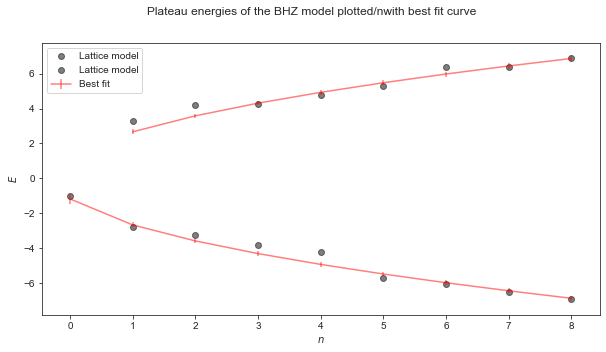

In [75]:
plt.figure(figsize=(10,5))
plt.suptitle("Plateau energies of the BHZ model plotted/nwith best fit curve")
plt.errorbar(x=ns[1::2],y=theory_fit_top,yerr=MC_errors[1::2],fmt='-',ms=13,c='r',
             alpha=0.5,label="Best fit")
plt.errorbar(x=ns[0::2],y=theory_fit_bot,yerr=MC_errors[0::2],fmt='-',ms=13,c='r',
             alpha=0.5)
plt.scatter(ns[1::2], Plateaus_ordered[1::2],c='k',alpha=0.5,label="Lattice model")
plt.scatter(ns[0::2], Plateaus_ordered[0::2],c='k',alpha=0.5,label="Lattice model")
plt.ylabel("$E$")
plt.xlabel("$n$")
plt.legend()
plt.show()

## Wavefunctions

In [703]:
w=Ws[:,idx_p[9]]
wpos=np.arange(0,90)
w1r,w1i,w0r,w0i=bhz.split_full(w)

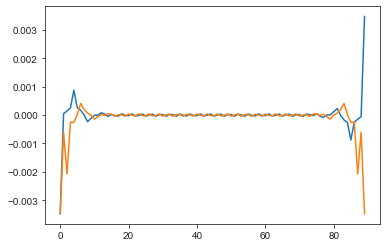

In [705]:
plt.plot(wpos,w0i[0::90])
plt.plot(wpos,w0r[0::90])

In [706]:
w=Ws[:,idx_p[9]+75]
wpos=np.arange(0,90)
w1r,w1i,w0r,w0i=bhz.split_full(w)

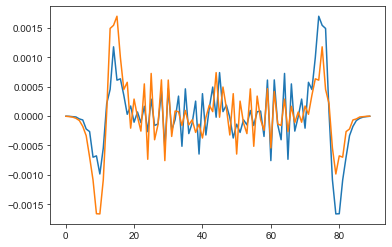

In [708]:
plt.plot(wpos,w0i[45::90])
plt.plot(wpos,w0r[45::90])

In [628]:
np.argmin(abs(Es_plateau))

9

In [693]:
psi = Ws[:,idx_p[9]]

In [694]:
p1r,p1i,p0r,p0i=bhz.split_full(psi)

In [695]:
pos = np.arange(0,90*90)
pos90 = np.arange(0,90)

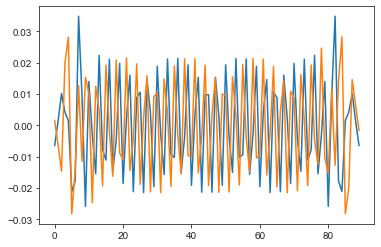

In [696]:
bump = 6
plt.figure()
plt.plot(pos90,p1r[90*bump:90*(bump+1)])
plt.plot(pos90,p1i[90*bump:90*(bump+1)])
plt.show()

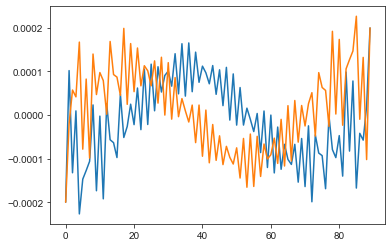

In [448]:
plt.figure()
plt.plot(np.arange(0,90),p0r[0:90])
plt.plot(np.arange(0,90),p0i[0:90])
plt.show()

In [328]:
pos=np.arange(0,H_real.shape[0])

In [385]:
waves_up, waves_down = bhz.split_spins(waves_plateau)
waves_up_re, waves_up_im = bhz.split_real_imaginary(waves_up)
waves_down_re, waves_down_im = bhz.split_real_imaginary(waves_down)

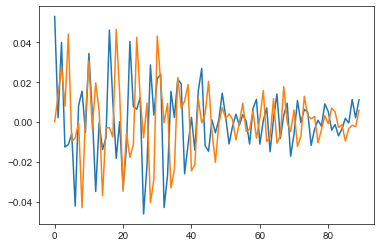

In [383]:
plt.figure()
plt.plot(np.arange(0,90),waves_up_re[0:90,27])
plt.plot(np.arange(0,90),waves_up_im[0:90,27])
plt.show()

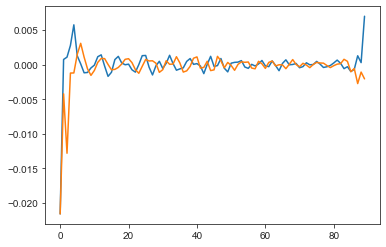

In [386]:
plt.figure()
plt.plot(np.arange(0,90),waves_down_re[0:90,27])
plt.plot(np.arange(0,90),waves_down_im[0:90,27])
plt.show()

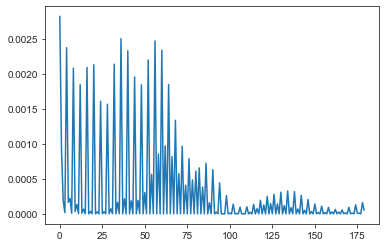

In [395]:
plt.figure()
plt.plot(np.arange(0,180),np.abs(waves_plateau[0:180,27])**2)
plt.show()

In [118]:
W_sq_batched_map = np.reshape(W_sq_batched,(100,100))

In [124]:
# make image array
# Ws.shape[0] = 10,000
spin_nos = 2
n = int(WsT.shape[0]/spin_nos)
m = int(n**(1/2))
image_map = np.zeros((n,m,m), dtype=float)
for i in range(n):
    prob_dist = batch_spins(WsT[i],spin_nos)
    image = prob_dist.reshape((m,m), order='C')
    image_map[i] = image

<IPython.core.display.Javascript object>


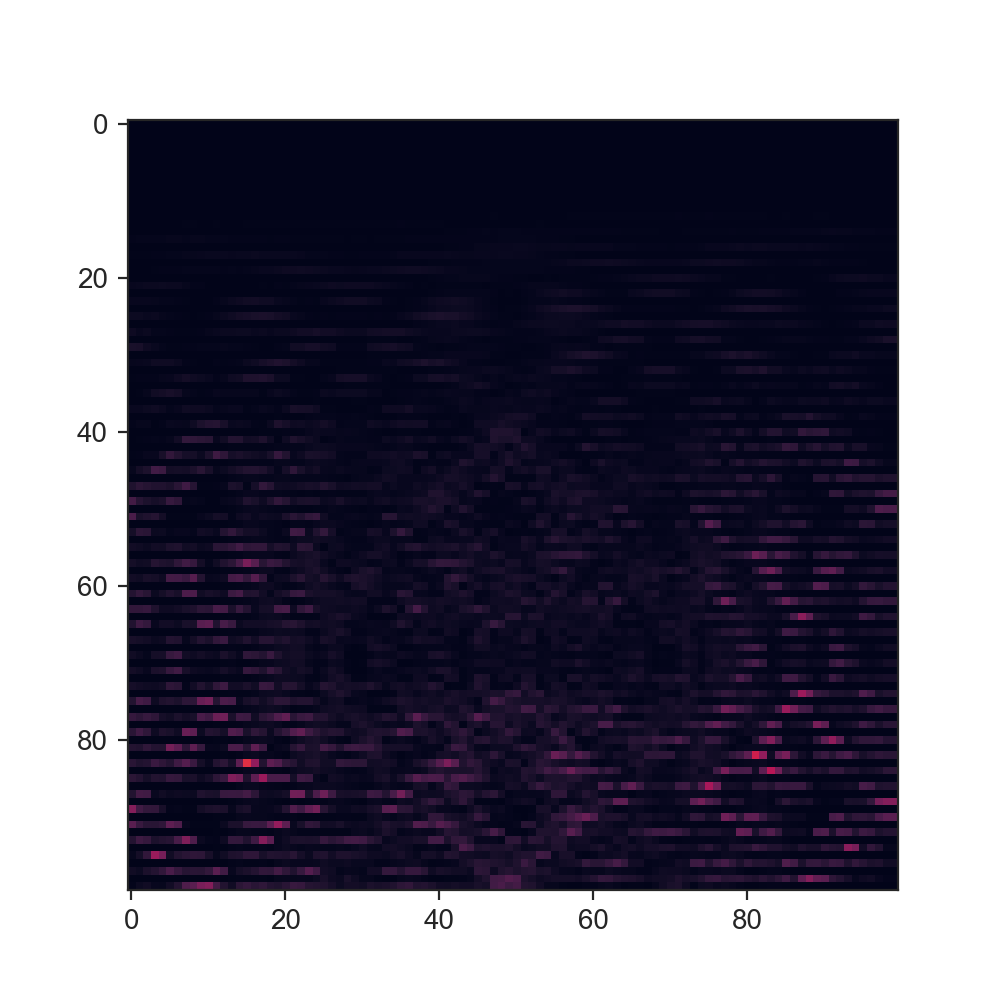

In [152]:
%matplotlib notebook
fig,ax = plt.subplots(figsize=(5,5))
i=0
im = ax.imshow(image_map[0,:,:], animated=True)
def updatefig(i):
    im.set_data(image_map[i,:,:])
    return [im]
ani = animation.FuncAnimation(fig, updatefig, interval = 1)
plt.draw()
plt.show()